https://qiita.com/beeesssaaa/items/68342472694a3f74d86e

In [1]:
#!pip install pyaudio
#!pip install keyboard
#!pip install sounddevice

In [2]:
import pyaudio
import numpy as np
import scipy.io.wavfile
import keyboard
import matplotlib.pyplot as plt
import sounddevice

In [3]:
p = pyaudio.PyAudio()
p.get_default_input_device_info()

{'index': 1,
 'structVersion': 2,
 'name': '繝槭う繧ｯ (USB PnP Sound Device)',
 'hostApi': 0,
 'maxInputChannels': 1,
 'maxOutputChannels': 0,
 'defaultLowInputLatency': 0.09,
 'defaultLowOutputLatency': 0.09,
 'defaultHighInputLatency': 0.18,
 'defaultHighOutputLatency': 0.18,
 'defaultSampleRate': 44100.0}

In [4]:
CHUNK = 1024
FORMAT = pyaudio.paFloat32
CHANNELS = p.get_default_input_device_info()['index']     # 1
RATE = 12000
RECORD_SECONDS = 1

In [8]:
def recording_audio(output_name):
    p = pyaudio.PyAudio()
    stream = p.open(rate = RATE, channels = CHANNELS, format = FORMAT, input = True, frames_per_buffer = CHUNK)

    print("Recording start ...          Press ENTER to stop recording\n")

    frame = []
    while True:                                 # start recording
        
        d = stream.read(CHUNK)
        d = np.frombuffer(d, dtype=np.float32)   # convert numpy   
        frame.append(d)

        if keyboard.is_pressed("enter"):
            break                                # end recording

    stream.stop_stream()                          # close
    stream.close()
    p.terminate()

    frame = np.array(frame).flatten()
    print("Stopped:   duration =  {:.2f}s".format(frame.size / RATE))
    
    scipy.io.wavfile.write(output_name, RATE, frame)     # write wav file with scipy module
    
    plt.figure(figsize = (8, 2))
    plt.plot(frame, color = "gray")

Recording start ...          Press ENTER to stop recording

Stopped:   duration =  2.65s


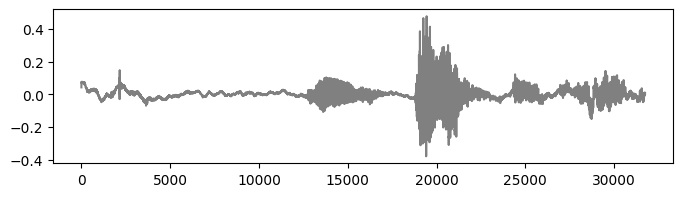

In [9]:
recording_audio('test.wav') 

In [10]:
fs, data = scipy.io.wavfile.read('test.wav')
sounddevice.play(data, fs)